## REGRESION LINEAL

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [3]:
df.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df['mnth'] = df['mnth'].astype('category')
df['yr'] = df['yr'].astype('category')
df['holiday'] = df['holiday'].astype('category')

In [6]:
df.dtypes

instant          int64
dteday          object
season          object
yr            category
mnth          category
holiday       category
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## REEMPLAZAR OUTLIERS

In [7]:
df_sin_outliers= df.copy()

In [8]:
df_sin_outliers.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [9]:
def detectar_outliers(lista_columnas, df_sin_outliers): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = df_sin_outliers[(df_sin_outliers[col] < Q1 - outlier_step) | (df_sin_outliers[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [10]:
columnas_numeric = df.select_dtypes(include = np.number)

In [11]:
lista_columnas = list(columnas_numeric)

In [12]:
ind = detectar_outliers(lista_columnas, df_sin_outliers)
print(ind)

{'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720], 'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679]}


In [13]:
numericas = df_sin_outliers.select_dtypes(include = np.number)

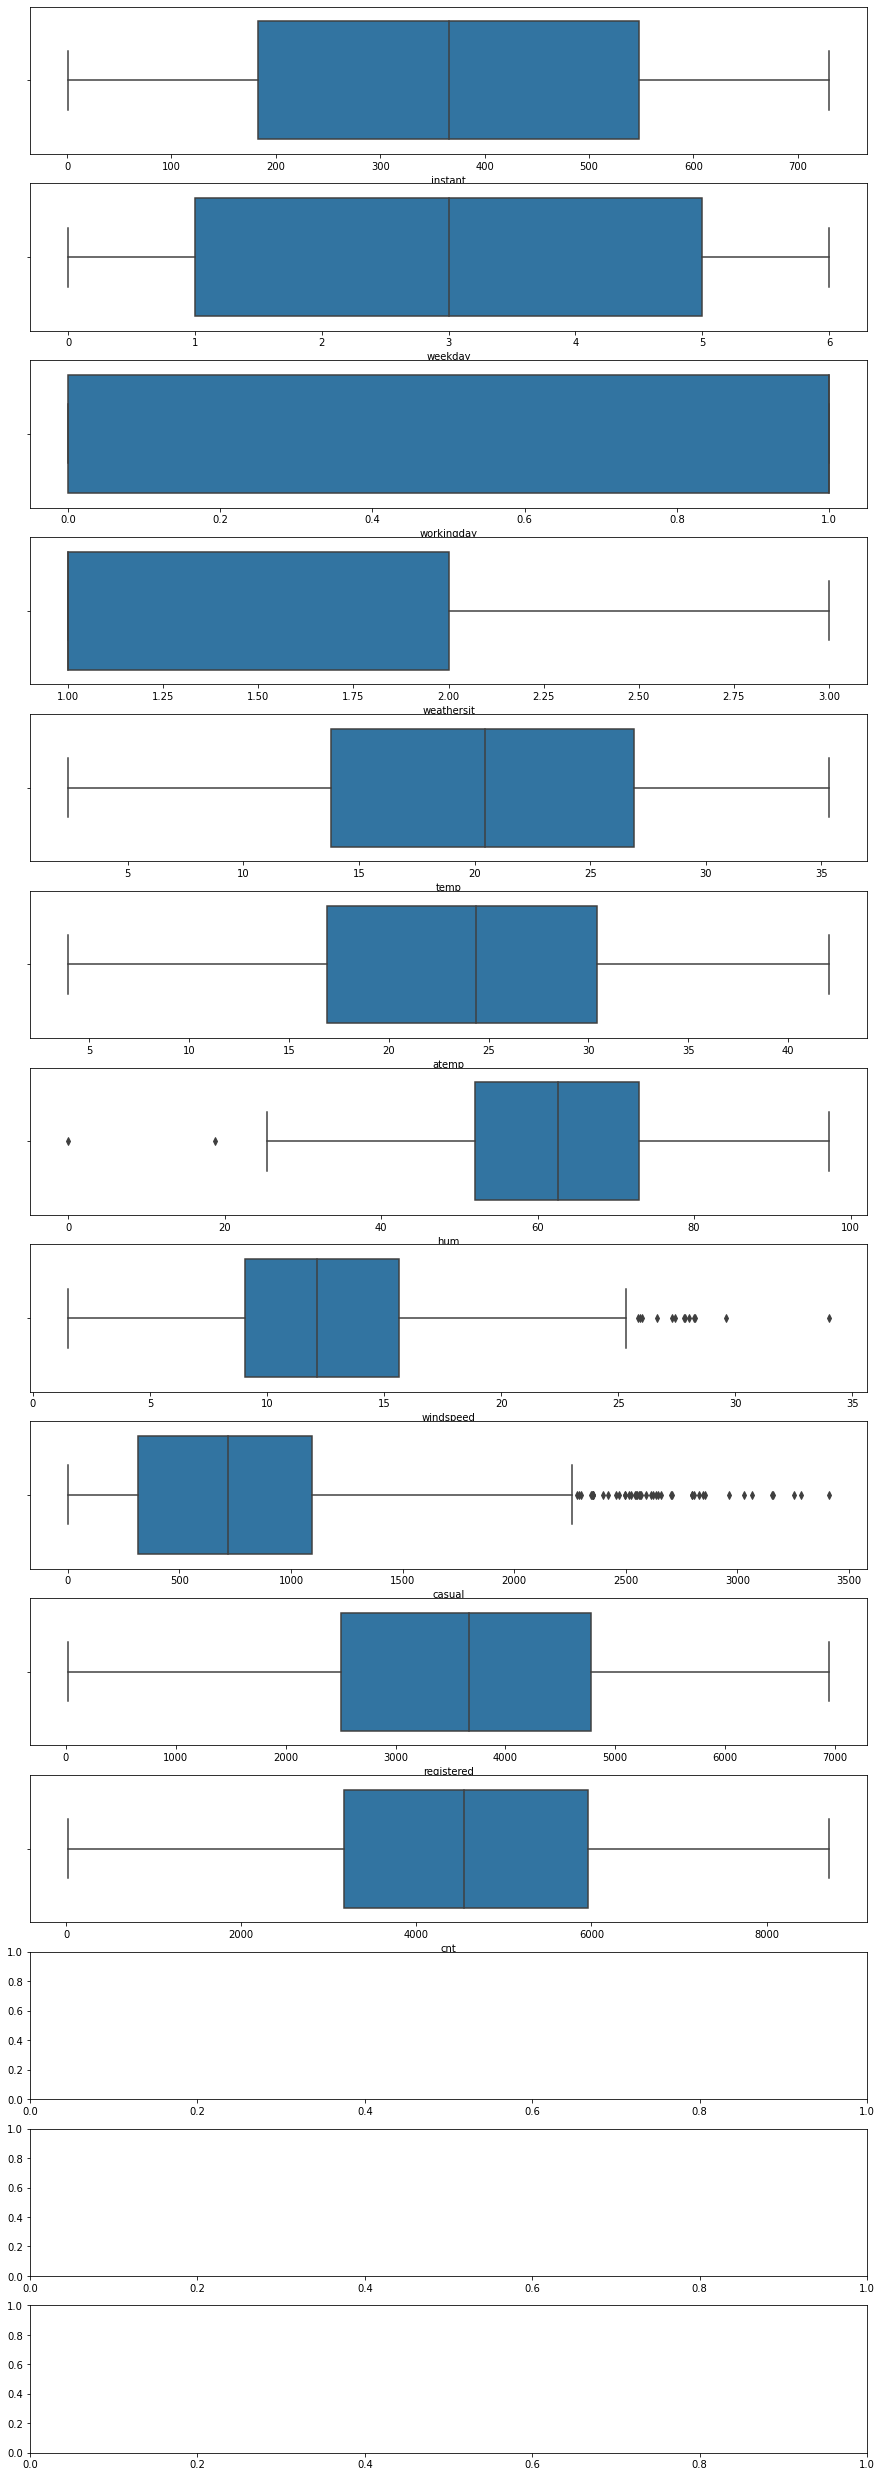

In [14]:
fig, axes = plt.subplots(14, 1, figsize=(15,45))

for i, col in enumerate(columnas_numeric):
    sns.boxplot(x = numericas.columns[i], data = df_sin_outliers, ax=axes[i]); # para trazar una línea de densidad

plt.show()

        Solo tiene sentido reemplzar los outliers de hum y windspeed por la mediana (temperatura no tiene outliers)

In [15]:
for key, values in ind.items():
    median = df_sin_outliers[key].median()
     
    if key == "hum" or key == 'windspeed':
        for i in values: 
            df_sin_outliers.loc[i,key] = median
    else:
        pass

# Hacemos el tratamiento de las variables categoricas
1. Encoding para la variable season
2. Eliminamos la variable date
3. Ponemos como categoricas las columnas:
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [16]:
## Cambio tipo variable

df_sin_outliers["yr"] = df_sin_outliers["yr"].astype('category')
df_sin_outliers["mnth"] = df_sin_outliers["mnth"].astype('category')
df_sin_outliers["holiday"] = df_sin_outliers["holiday"].astype('category')

In [17]:
df_sin_outliers["weekday"] = df_sin_outliers["weekday"].astype('category')
df_sin_outliers["workingday"] = df_sin_outliers["workingday"].astype('category')
df_sin_outliers["weathersit"] = df_sin_outliers["weathersit"].astype('category')

In [18]:
mapa_season = {"spring": 0,"summer": 1, "autumn": 2, "winter": 3} #asigno a cada estacion un valor
df_sin_outliers["season"] = df_sin_outliers["season"].map(mapa_season)#asigno a la columna los valores

In [19]:
df_sin_outliers.season.unique()#comprobamos que remplazamos los valores de forma correcta

array([0, 1, 2, 3])

In [20]:
## Eliminamos las columnas q no usaremos
df_sin_outliers.drop(columns = ['dteday', "instant"],inplace=True)

# Comprobación de las asunciones

## Asunción de normalidad

| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

In [21]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [22]:
df_sin_outliers['casual'], lambda_ajustada = stats.boxcox(df_sin_outliers['casual'])

In [23]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

In [24]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [25]:
df_sin_outliers['registered'], lambda_ajustada = stats.boxcox(df_sin_outliers['registered'])# usamos el boxcoc

In [26]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.9854233264923096, pvalue=1.1640980801530532e-06)

In [27]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

In [28]:
df_sin_outliers['cnt'], lambda_ajustada = stats.boxcox(df_sin_outliers['cnt'])# usamos el boxcoc

In [29]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9801719784736633, pvalue=2.1925126603150602e-08)

        Analizando los pvalue de las tres variables que podriamos usar como predictoras: La variable casual es la de mejor resultado muy cercana al valor de normalidad. la segunda opción sería la variable registered y la última seria CNT.

## Asunción de homocedasticidad

Las varianzas no difieren entre las distintas categorías de nuestros datos


| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

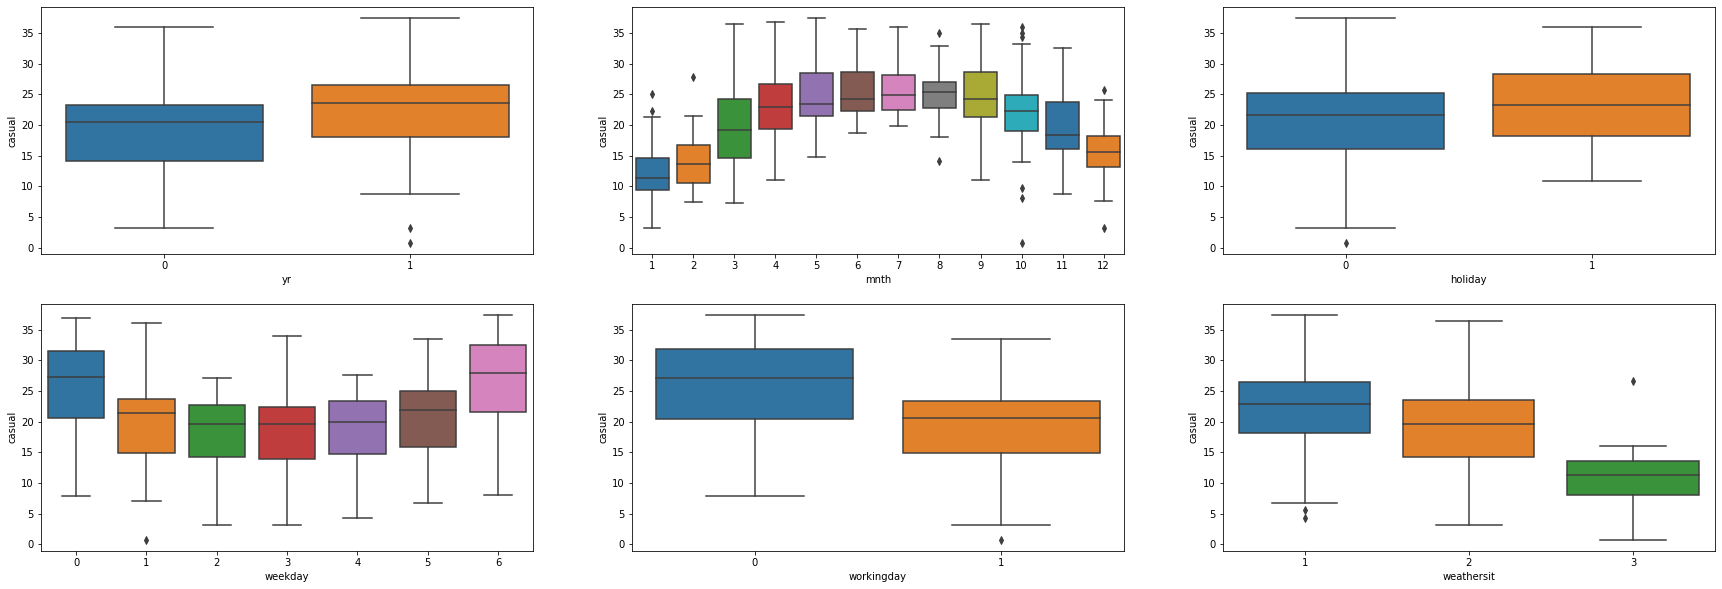

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_cat = df_sin_outliers.select_dtypes(include = ["object","category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'casual',
    data    = df_sin_outliers,
    palette = 'tab10',
    ax      = axes[i]
    )

In [31]:
def datos_test_levene(columna, df_sin_outliers):
    valores = df_sin_outliers[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df_sin_outliers[df_sin_outliers[columna] == x]["casual"]
    return d

In [32]:
df_sin_outliers["season"].unique()

array([0, 1, 2, 3])

In [33]:
primavera = df_sin_outliers[df_sin_outliers["season"] == 0]["registered"]
verano = df_sin_outliers[df_sin_outliers["season"] == 1]["registered"]
otoño = df_sin_outliers[df_sin_outliers["season"] == 2]["registered"]
invierno = df_sin_outliers[df_sin_outliers["season"] == 3]["registered"]

In [34]:
levene_test = stats.levene(primavera, verano, otoño, invierno, center='median')
levene_test

LeveneResult(statistic=0.6146116089076674, pvalue=0.6056733817481184)

In [35]:
primavera = df_sin_outliers[df_sin_outliers["season"] == 0]["casual"]
verano = df_sin_outliers[df_sin_outliers["season"] == 1]["casual"]
otoño = df_sin_outliers[df_sin_outliers["season"] == 2]["casual"]
invierno = df_sin_outliers[df_sin_outliers["season"] == 3]["casual"]

In [36]:
levene_test = stats.levene(primavera, verano, otoño, invierno, center='median')
levene_test

LeveneResult(statistic=5.590788006818617, pvalue=0.0008568902160877667)

In [ ]:
levene_region = stats.levene(region['southwest'], region['southeast'], region['northwest'], region['northeast'], center='median')
levene_region

In [ ]:
levene_hijos = stats.levene(hijos['1'], hijos['2'], hijos['3'], hijos['4'], hijos['5'],  center='median')
levene_hijos

    NOS SALTAMOS ESTO DE TODAS LAS VARIABLES XQ CON LAS GRÁFICAS YA VIMOS QUE NO SON HOMOCEDASTICIDAD

## Asunción independencia



| Test Independencia |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

In [39]:
columnas = df_sin_outliers.columns
columnas

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones

In [ ]:
combinaciones_3 = list(itertools.combinations(columnas, 3))
combinaciones_3

In [43]:
for par in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_sin_outliers[par[0]], df_sin_outliers[par[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print("---------------------------------", par[0], par[1], "---------------------------------")
    print(test_results)

--------------------------------- season yr ---------------------------------
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =       0.0
1                    p-value =       1.0
2                 Cramer's V =       0.0
--------------------------------- season mnth ---------------------------------
                 Chi-square test   results
0  Pearson Chi-square ( 33.0) =   1762.002
1                     p-value =      0.000
2                  Cramer's V =      0.897
--------------------------------- season holiday ---------------------------------
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    1.5184
1                    p-value =    0.6780
2                 Cramer's V =    0.0456
--------------------------------- season weekday ---------------------------------
                 Chi-square test  results
0  Pearson Chi-square ( 18.0) =    0.4845
1                     p-value =    1.0000
2                  Cramer's V =    0.0149
--------

    Recordar revisar los p-value 

# Estandarizar

In [49]:
df_estandarizado= df_sin_outliers.copy()
df_estandarizado

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,267.555838,505.996686
1,0,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472436,273.035087,421.088796
2,0,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,453.922867,668.973854
3,0,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613969,522.514819,761.935939
4,0,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,541.694837,778.363472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,14.685846,644.097935,996.622027
726,0,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,20.925025,808.749248,1397.583775
727,0,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,12.387360,439.342954,665.451191
728,0,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,16.988115,515.889756,862.414676


In [50]:
st = StandardScaler()
x_tranformadas = pd.DataFrame(st.fit_transform(columnas_numeric))
x_tranformadas.columns = columnas_numeric.columns
df_estandarizado[x_tranformadas.columns] = x_tranformadas
df_estandarizado.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,0,0,1,0,1.497785,-1.469753,1.112127,-0.827613,-0.680818,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,-1.729680
1,0,0,1,0,-1.495052,-1.469753,1.112127,-0.722069,-0.741507,0.480996,0.748899,-1.046996,-1.917480,-1.916078,-1.724934
2,0,0,1,0,-0.996246,0.680387,-0.724644,-1.635432,-1.750344,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,-1.720189
3,0,0,1,0,-0.497440,0.680387,-0.724644,-1.615560,-1.610886,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,-1.715444
4,0,0,1,0,0.001367,0.680387,-0.724644,-1.468226,-1.505615,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,-1.710698


# HACER MANOVA